In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
fd = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_wa.xlsx")
 
fd

,EastofWA,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,2.41,11.0,67703,534,516,2326,2,11,0,...,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,0.00,18.2,62500,435,305,1524,24,12,2,...,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,0.42,29.0,42900,2656,477,3747,48,15,2,...,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,2.59,27.0,55521,1018,330,1764,13,29,0,...,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0.00,28.0,57831,1869,287,2342,22,58,0,...,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1,1.44,29.4,52059,1441,473,1459,17,42,7,...,2.675778,3.134814,1.255273,1.633468,0.903090,3.177248,3.146748,3.281488,1.806180,2.526339
1435,1,0.08,23.4,51875,1171,431,1164,12,13,3,...,2.635484,3.028978,1.113943,1.146128,0.602060,3.285557,2.748963,2.833784,1.799341,2.340444
1436,1,2.76,31.2,36659,2520,440,1106,31,130,7,...,2.644439,3.004751,1.505150,2.117271,0.903090,3.007748,3.651859,3.707655,2.012837,2.794488
1437,1,1.73,21.2,44451,1711,364,1750,30,23,0,...,2.562293,3.218798,1.491362,1.380211,0.000000,2.690196,3.380754,3.555820,1.924279,2.652246


In [3]:
# drop the irrelevant inputs
wa = fd.drop(fd.columns[1:15], axis=1)


wa.head()

,EastofWA,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,0,0.532754,1.075547,4.655551,2.719331,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,1,0.000000,1.281033,4.602494,2.628389,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,1,0.152288,1.475671,4.310481,3.422590,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,0,0.555094,1.445604,4.519316,3.003461,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0,0.000000,1.460898,4.548647,3.269279,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822


In [4]:
# divided wa data into the independent and dependent variables
X = wa.drop(['FoodDesert'], axis = 1) # all independent
y = wa['FoodDesert']  # target

In [5]:
X.head()

,EastofWA,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,0.532754,1.075547,4.655551,2.719331,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,0.000000,1.281033,4.602494,2.628389,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,0.152288,1.475671,4.310481,3.422590,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,0.555094,1.445604,4.519316,3.003461,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0.000000,1.460898,4.548647,3.269279,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822


In [6]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1434    0
1435    1
1436    0
1437    0
1438    0
Name: FoodDesert, Length: 1439, dtype: int64

In [7]:
# Split data into independent variables (X) and dependent variable (y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()


Logistic Regression Results:
Accuracy: 0.649
Precision: 0.557
Recall: 0.482
F1 Score: 0.517

Decision Tree Results:
Accuracy: 0.608
Precision: 0.496
Recall: 0.580
F1 Score: 0.535

Random Forest Results:
Accuracy: 0.698
Precision: 0.624
Recall: 0.562
F1 Score: 0.592

XGBoost Results:
Accuracy: 0.663
Precision: 0.565
Recall: 0.580
F1 Score: 0.573

LightGBM Results:
Accuracy: 0.684
Precision: 0.600
Recall: 0.562
F1 Score: 0.581

SVM Results:
Accuracy: 0.670
Precision: 0.616
Recall: 0.402
F1 Score: 0.486

KNN Results:
Accuracy: 0.639
Precision: 0.535
Recall: 0.545
F1 Score: 0.540



The classification report shows that the model has an overall accuracy of 0.65, which means that the model correctly predicted the class of 65% of the instances in the test set. The precision for class 0 is 0.70, which means that when the model predicts class 0, it is correct 70% of the time. The recall for class 0 is 0.76, which means that the model correctly identifies 76% of the instances that belong to class 0. The precision for class 1 is 0.56, which means that when the model predicts class 1, it is correct 56% of the time. The recall for class 1 is 0.48, which means that the model correctly identifies 48% of the instances that belong to class 1.

The F1-score is a harmonic mean of precision and recall, and it gives an overall measure of the model's performance. The F1-score for class 0 is 0.72, and the F1-score for class 1 is 0.52.

The macro-avg F1-score is 0.62, which is the average of the F1-scores for both classes. The weighted-avg F1-score is 0.64, which is the weighted average of the F1-scores for both classes, where the weight is proportional to the number of instances in each class.

The ROC-AUC score is 0.62, which means that the model's ability to distinguish between the two classes is slightly better than random guessing. A perfect model has an ROC-AUC score of 1.0, while a random model has an ROC-AUC score of 0.5.

The classification report and ROC-AUC score indicate that the model's performance is fair, but not great. The accuracy score of 0.65 indicates that the model correctly classified 65% of the samples, which is better than random guessing but still has room for improvement. The precision and recall scores are also relatively low, indicating that the model is not able to correctly identify all positive samples and has a higher rate of false positives.

In summary, while the model is performing better than random guessing, there is still room for improvement, and it may be beneficial to explore other modeling approaches or data preprocessing techniques to try to improve its performance.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix



# Fit a logistic regression model
Baseline_model = LogisticRegression(max_iter=10000)
Baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred_proba = Baseline_model.predict_proba(X_test)[:, 1] # predict probabilities for the positive class

# Calculate the accuracy of the model
y_pred = Baseline_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Baseline model accuracy:", accuracy)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the ROC curve
plot_roc_curve(Baseline_model, X_test, y_test) # use the input data instead of the predicted labels
plt.show()


Baseline model accuracy: 0.6493055555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.72       176
           1       0.56      0.48      0.52       112

    accuracy                           0.65       288
   macro avg       0.63      0.62      0.62       288
weighted avg       0.64      0.65      0.64       288

ROC-AUC Score: 0.6189123376623376
Confusion Matrix:
 [[133  43]
 [ 58  54]]


NameError: name 'plot_roc_curve' is not defined

In [11]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Define the pipeline
# pipeline = Pipeline([
#   ('scaler', StandardScaler()), # Scale the features
#   ('selector', SelectKBest(f_classif, k=10)), # Select the top 10 features
#   ('model', LogisticRegression()) # Train the logistic regression model
# ])

# # Fit the pipeline on the training data
# pipeline.fit(train_data.drop('FoodDesert', axis=1), train_data['FoodDesert'])

# # Make predictions on the test data
# predictions = pipeline.predict(test_data.drop('FoodDesert', axis=1))

# # Evaluate the performance of the model
# accuracy = accuracy_score(test_data['FoodDesert'], predictions)
# print("Accuracy:", accuracy)


Baseline model2 accuracy: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       176
           1       0.65      0.54      0.59       112

    accuracy                           0.71       288
   macro avg       0.69      0.68      0.68       288
weighted avg       0.70      0.71      0.70       288

ROC-AUC Score: 0.6769480519480519
Confusion Matrix:
 [[144  32]
 [ 52  60]]


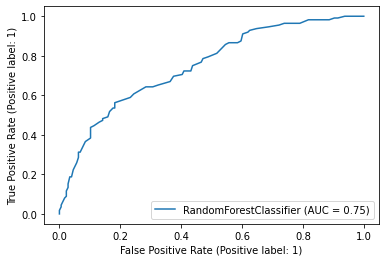

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, plot_roc_curve


# Create a baseline Random Forest model
Baseline_model2 = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model on the training data
Baseline_model2.fit(X_train, y_train)

# Predict on the test set
y_pred = Baseline_model2.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Baseline model2 accuracy:", accuracy)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the ROC curve
plot_roc_curve(Baseline_model2, X_test, y_test)
plt.show()


In [13]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split


# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'max_depth': -1,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_jobs': -1,
    'random_state': 42
}

# Train the model
num_round = 100
Baseline_model = lgb.train(params, train_data, num_round)

# Make predictions on the test set
y_pred = Baseline_model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Baseline model accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


[LightGBM] [Info] Number of positive: 491, number of negative: 660
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3290
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.426586 -> initscore=-0.295796
[LightGBM] [Info] Start training from score -0.295796
Baseline model accuracy: 0.6701388888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       176
           1       0.58      0.56      0.57       112

    accuracy                           0.67       288
   macro avg       0.65      0.65      0.65       288
weighted avg       0.67      0.67      0.67       288

ROC-AUC Score: 0.6505681818181818
Confusion Matrix:
 [[130  46]
 [ 49  63]]


In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters for the model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
Baseline_model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = Baseline_model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Baseline model accuracy:", accuracy)

# Calculate the classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", cm)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
Baseline model accuracy: 0.6909722222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       176
           1       0.60      0.62      0.61       112

    accuracy                           0.69       288
   macro avg       0.68      0.68      0.68       288
weighted avg       0.69      0.69      0.69       288

ROC-AUC Score: 0.7326501623376622
Confusion Matrix:
 [[130  46]
 [ 43  69]]


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the Discriminant Analysis model
model = LinearDiscriminantAnalysis()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

report = classification_report(y_test, predictions)
print("Classification Report:\n", report)


Accuracy: 0.6423611111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       176
           1       0.54      0.49      0.52       112

    accuracy                           0.64       288
   macro avg       0.62      0.61      0.62       288
weighted avg       0.64      0.64      0.64       288



In [17]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score



# Create a pipeline for feature selection and regularization
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=5)),
    ('classifier', RidgeClassifier(alpha=0.1))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipe.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6597222222222222
